In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
loan = pd.read_csv("loan.csv", sep=",")

In [10]:
loan.describe

<bound method NDFrame.describe of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ... 

In [12]:
#Data Cleaning
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [14]:
#High number of columns with null values, let's drop them
threshold = 0.9
loan_removed_empty_columns = loan.dropna(axis=1, thresh=int(threshold * len(loan)))

In [16]:
loan_removed_empty_columns.shape

(39717, 53)

In [18]:
missing_values = loan_removed_empty_columns.isnull().sum()
# Calculate the percentage of missing values in each column
percentage_missing = (missing_values / len(loan_removed_empty_columns)) * 100
print (percentage_missing)

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [20]:
len(loan_removed_empty_columns[loan_removed_empty_columns.isnull().any(axis=1) > 2])

0

In [ ]:
loan_removed_empty_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [24]:
# Looking at the Data Dicitonary, it is observed that there are a few columns 
# which can be removed as they are related to Post Loan Approval process 
notneeded_columns =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type",
  "chargeoff_within_12_mths"]

In [26]:
loan_removed_notneeded_columns = loan_removed_empty_columns.drop(notneeded_columns, axis=1)
loan_removed_notneeded_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [28]:
# There are some columns related to the applicant which do not play any role in loan application and can be removed
user_notneeded_columns = ["id", "member_id", "url", "title", "emp_title", "zip_code", "addr_state"]

In [30]:
loan_removed_notneededuser_columns = loan_removed_notneeded_columns.drop(user_notneeded_columns, axis=1)
loan_removed_notneededuser_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   39717 non-null  int64  
 1   funded_amnt                 39717 non-null  int64  
 2   funded_amnt_inv             39717 non-null  float64
 3   term                        39717 non-null  object 
 4   int_rate                    39717 non-null  object 
 5   installment                 39717 non-null  float64
 6   grade                       39717 non-null  object 
 7   sub_grade                   39717 non-null  object 
 8   emp_length                  38642 non-null  object 
 9   home_ownership              39717 non-null  object 
 10  annual_inc                  39717 non-null  float64
 11  verification_status         39717 non-null  object 
 12  issue_d                     39717 non-null  object 
 13  loan_status                 397

In [32]:
loan_removed_notneededuser_columns.shape

(39717, 24)

In [ ]:
#Data Analysis

In [40]:
loan_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   37544 non-null  int64  
 1   funded_amnt                 37544 non-null  int64  
 2   funded_amnt_inv             37544 non-null  float64
 3   term                        37544 non-null  object 
 4   int_rate                    37544 non-null  object 
 5   installment                 37544 non-null  float64
 6   grade                       37544 non-null  object 
 7   sub_grade                   37544 non-null  object 
 8   emp_length                  37544 non-null  object 
 9   home_ownership              37544 non-null  object 
 10  annual_inc                  37544 non-null  float64
 11  verification_status         37544 non-null  object 
 12  issue_d                     37544 non-null  object 
 13  loan_status                 375

In [ ]:
#Dropping records if 'emp_length' is null
loan_cleaned = loan_removed_notneededuser_columns[~loan_removed_notneededuser_columns['emp_length'].isnull()]
#'emp_length' is object and can be converted to int
#Finding unique values of 'emp_length'
loan_cleaned.emp_length.unique()

In [42]:
# Define a function to extract digits from 'emp_length'
import re

# function that extract the digits from input
def extract_digits(string):
    match = re.search(r'\d+', string)
    if match:
        return int(match.group())
    else:
        return None
loan_cleaned['emp_length']= loan_cleaned['emp_length'].apply(extract_digits)
print(loan_cleaned['emp_length'])


0        10
1         1
2        10
3        10
5         3
         ..
39712     4
39713     3
39714     1
39715     1
39716     1
Name: emp_length, Length: 37544, dtype: int64


In [44]:
loan_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   37544 non-null  int64  
 1   funded_amnt                 37544 non-null  int64  
 2   funded_amnt_inv             37544 non-null  float64
 3   term                        37544 non-null  object 
 4   int_rate                    37544 non-null  object 
 5   installment                 37544 non-null  float64
 6   grade                       37544 non-null  object 
 7   sub_grade                   37544 non-null  object 
 8   emp_length                  37544 non-null  int64  
 9   home_ownership              37544 non-null  object 
 10  annual_inc                  37544 non-null  float64
 11  verification_status         37544 non-null  object 
 12  issue_d                     37544 non-null  object 
 13  loan_status                 375

In [ ]:
#Checking the 'loan_status' value
loan_cleaned.loan_status.unique()

In [ ]:
#Removing records where 'loan_status' is 'current' as we cannot determine much if an account will default or not
loan_cleaned = loan_cleaned[loan_cleaned.loan_status != "Current"]
loan_cleaned.loan_status.unique()

In [ ]:
#Convert int_rate to numneric
loan_cleaned['int_rate'] = loan_cleaned['int_rate'].str.replace('%', '').astype(float)

In [225]:
loan_cleaned['term'] = loan_cleaned['term'].str.replace(' months', '').astype(int)

AttributeError: Can only use .str accessor with string values!

In [49]:
#Analyse the values in 'home_ownership'
loan_cleaned.home_ownership.value_counts()

RENT        18078
MORTGAGE    16595
OWN          2770
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [52]:
loan_cleaned.home_ownership.replace(to_replace = ['NONE'],value='OTHER',inplace = True)
loan_cleaned.home_ownership.value_counts()

RENT        18078
MORTGAGE    16595
OWN          2770
OTHER         101
Name: home_ownership, dtype: int64

In [134]:
#Converting numerical values to categorical for better analysis

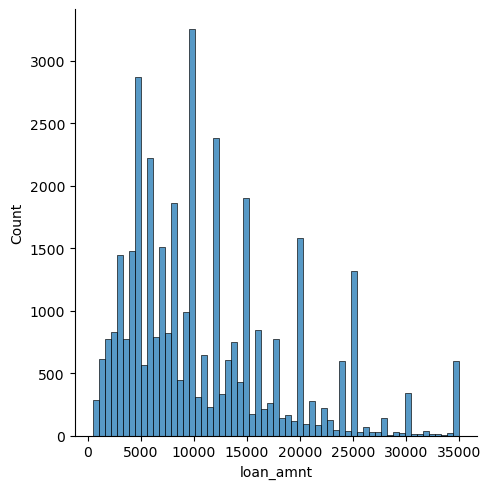

In [54]:
sns.displot(loan_cleaned['loan_amnt'])
plt.show()

In [55]:
loan_cleaned['loan_amnt_category'] = pd.cut(loan_cleaned.loan_amnt,bins=5,precision=0,labels=['0-7k','8-14k','15-21k','22-28k','29-35k'])
loan_cleaned['loan_amnt_category'].value_counts()

0-7k      14204
8-14k     12625
15-21k     6851
22-28k     2746
29-35k     1118
Name: loan_amnt_category, dtype: int64

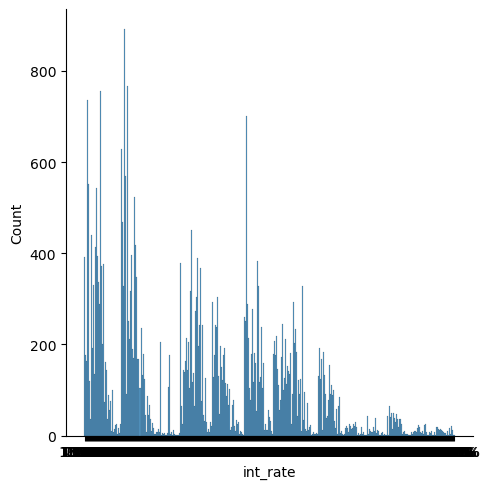

In [58]:
sns.displot(loan_cleaned['int_rate'])
plt.show()

In [59]:
loan_cleaned['int_rate_category'] = pd.cut(loan_cleaned.loan_amnt,bins=5,precision=0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan_cleaned['int_rate_category'].value_counts()

5%-9%      14204
9%-13%     12625
13%-17%     6851
17%-21%     2746
21%-24%     1118
Name: int_rate_category, dtype: int64

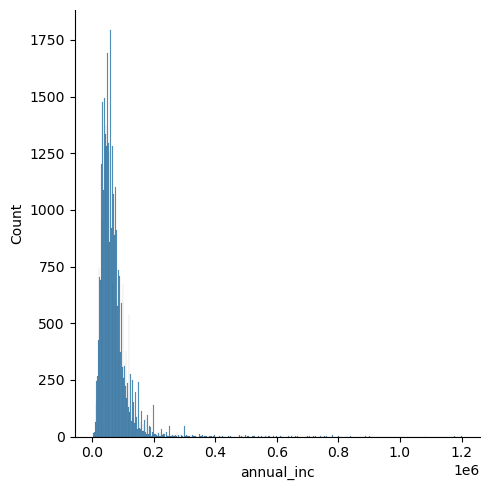

In [138]:
sns.displot(loan_cleaned['annual_inc'])

<Axes: >

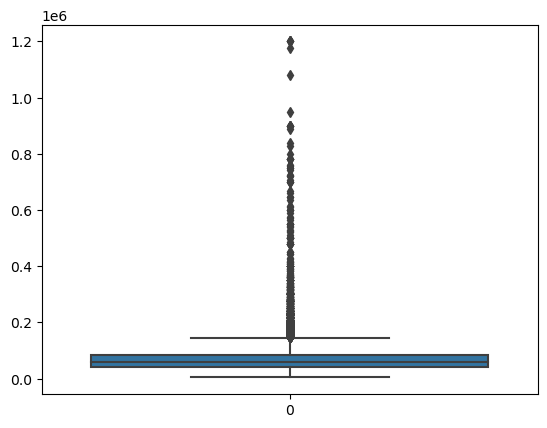

In [140]:
sns.boxplot(loan_cleaned['annual_inc'])

In [142]:
loan_cleaned.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,emp_length,annual_inc,dti,collections_12_mths_ex_med,policy_code,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,37536.000000,37536.000000,37536.000000,37536.000000,37536.000000,37536.000000,3.753600e+04,37536.000000,37480.0,37536.0,37536.0,37536.0,36840.000000,37497.0
mean,11119.548567,10853.975517,10281.026348,41.917519,324.665921,5.060875,6.889774e+04,13.286361,0.0,1.0,0.0,0.0,0.041802,0.0
std,7354.167228,7096.673831,7034.473732,10.344384,208.914191,3.401729,4.953007e+04,6.658790,0.0,0.0,0.0,0.0,0.200817,0.0
min,500.000000,500.000000,0.000000,36.000000,15.690000,1.000000,4.000000e+03,0.000000,0.0,1.0,0.0,0.0,0.000000,0.0
25%,5500.000000,5400.000000,5000.000000,36.000000,167.340000,2.000000,4.100000e+04,8.160000,0.0,1.0,0.0,0.0,0.000000,0.0
50%,10000.000000,9600.000000,8850.000000,36.000000,280.000000,4.000000,6.000000e+04,13.385000,0.0,1.0,0.0,0.0,0.000000,0.0
75%,15000.000000,15000.000000,14076.093685,36.000000,429.157500,9.000000,8.300000e+04,18.550000,0.0,1.0,0.0,0.0,0.000000,0.0
max,35000.000000,35000.000000,35000.000000,60.000000,1305.190000,10.000000,1.200000e+06,29.990000,0.0,1.0,0.0,0.0,2.000000,0.0


In [64]:
loan_cleaned['annual_inc_category'] = pd.cut(loan_cleaned.annual_inc,bins=5,precision=0,labels=['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
loan_cleaned['annual_inc_category'].value_counts()

3k-31k       37536
31k-58k          6
85k-112k         1
112k-140k        1
58k-85k          0
Name: annual_inc_category, dtype: int64

In [66]:
loan_cleaned = loan_cleaned[loan_cleaned['annual_inc_category'] == '3k-31k']

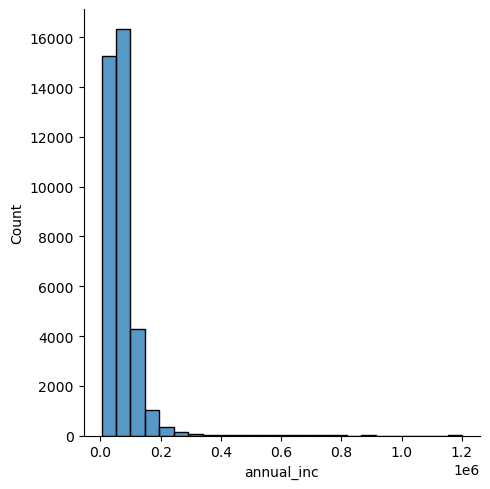

In [191]:
sns.displot(loan_cleaned['annual_inc'], bins=25)
plt.show()

In [69]:
loan_cleaned['annual_inc'].value_counts()

60000.0     1434
50000.0     1009
40000.0      838
45000.0      794
75000.0      779
            ... 
108820.0       1
85634.0        1
126996.0       1
57110.0        1
27376.0        1
Name: annual_inc, Length: 4998, dtype: int64

In [72]:
loan_cleaned['annual_inc_category'] = pd.cut(loan_cleaned.annual_inc,bins=3,precision=0,labels=['0k-1k','1k-2k','2k-10k'])
loan_cleaned['annual_inc_category'].value_counts()

0k-1k     37455
1k-2k        67
2k-10k       14
Name: annual_inc_category, dtype: int64

In [76]:
loan_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37536 entries, 0 to 39716
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   loan_amnt                   37536 non-null  int64   
 1   funded_amnt                 37536 non-null  int64   
 2   funded_amnt_inv             37536 non-null  float64 
 3   term                        37536 non-null  object  
 4   int_rate                    37536 non-null  object  
 5   installment                 37536 non-null  float64 
 6   grade                       37536 non-null  object  
 7   sub_grade                   37536 non-null  object  
 8   emp_length                  37536 non-null  int64   
 9   home_ownership              37536 non-null  object  
 10  annual_inc                  37536 non-null  float64 
 11  verification_status         37536 non-null  object  
 12  issue_d                     37536 non-null  object  
 13  loan_status     

In [78]:
loan_cleaned.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,loan_amnt_category,int_rate_category,annual_inc_category,installment_category,funded_amnt_inv_category,dti_category
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10,RENT,...,0,0,0.0,0.0,0-5k,5%-9%,0k-1k,145-274,0-5k,24-30
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,1,RENT,...,0,0,0.0,0.0,0-5k,5%-9%,0k-1k,14-145,0-5k,0-6
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10,RENT,...,0,0,0.0,0.0,0-5k,5%-9%,0k-1k,14-145,0-5k,6-12
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10,RENT,...,0,0,0.0,0.0,5k-10k,9%-13%,0k-1k,274-403,5k-10k,18-24
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3,RENT,...,0,0,0.0,0.0,0-5k,5%-9%,0k-1k,145-274,0-5k,6-12


In [80]:
#Univariate Analysis

<Axes: xlabel='grade', ylabel='count'>

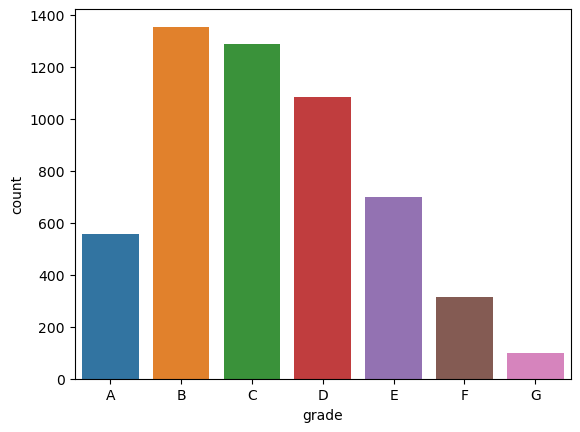

In [144]:
sns.countplot(x = 'grade', data = loan_cleaned[loan_cleaned.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

<Axes: xlabel='sub_grade', ylabel='count'>

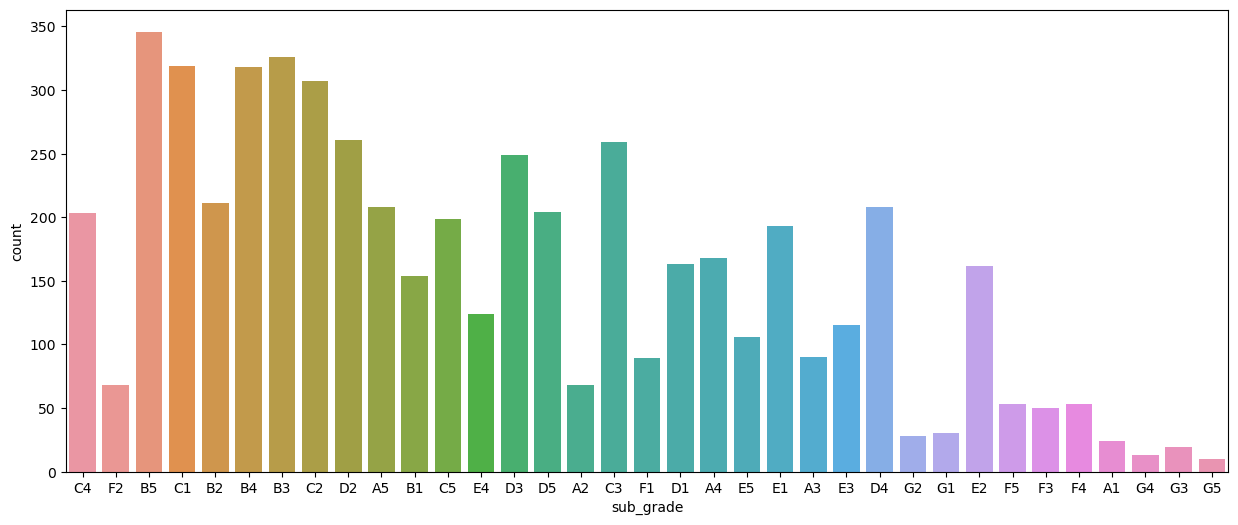

In [83]:
fig,ax = plt.subplots(figsize = (15,6))
sns.countplot(x = 'sub_grade', data = loan_cleaned[loan_cleaned.loan_status == 'Charged Off'])

In [199]:
#Observation: More defaults for when 'grade' is 'B' and 'sub_grade' is 'B5'

<Axes: xlabel='home_ownership', ylabel='count'>

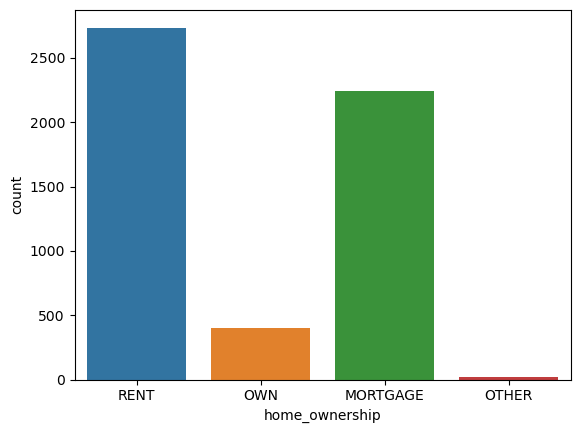

In [86]:
sns.countplot(x='home_ownership', data=loan_cleaned[loan_cleaned['loan_status']=='Charged Off'])

In [201]:
#Observation: More defaults when 'home_ownership' is 'RENT' or 'MORTGAGE'

<Axes: xlabel='count', ylabel='purpose'>

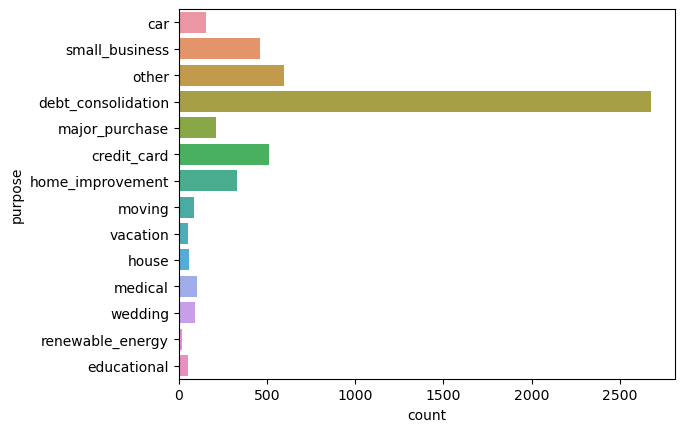

In [88]:
sns.countplot(y ='purpose', data=loan_cleaned[loan_cleaned.loan_status == 'Charged Off'])

In [203]:
#Observation: More defaults when 'purpose' of loan is 'debt_consolidation'

<Axes: xlabel='int_rate_category', ylabel='count'>

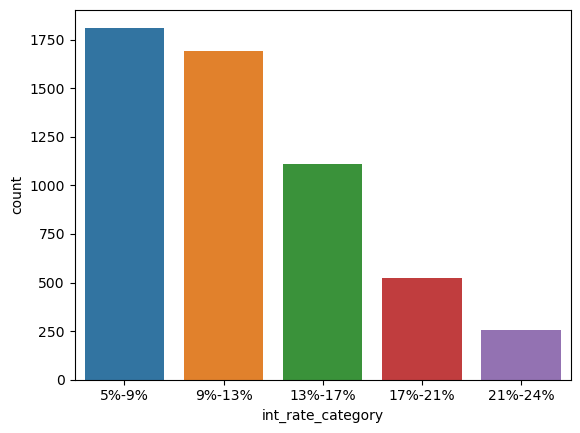

In [89]:
sns.countplot(x='int_rate_category', data=loan_cleaned[loan_cleaned.loan_status == 'Charged Off'])

In [205]:
#Observation: More defaults when 'int_rate' falls in 5-9%

<Axes: xlabel='emp_length', ylabel='count'>

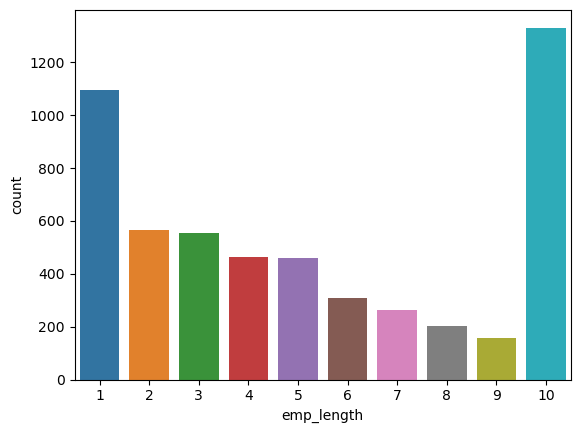

In [92]:
sns.countplot(x='emp_length', data=loan_cleaned[loan_cleaned.loan_status == 'Charged Off'])

In [207]:
#Observation: More defaults when 'emp_length' of 10

<Axes: xlabel='annual_inc_category', ylabel='count'>

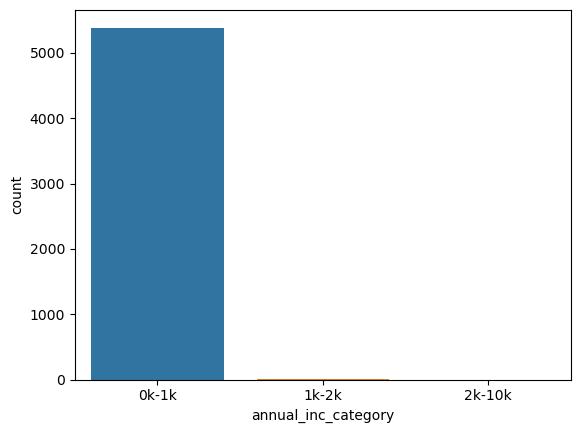

In [94]:
sns.countplot(x='annual_inc_category', data=loan_cleaned[loan_cleaned.loan_status == 'Charged Off'])

In [209]:
#Observation: More defaults when 'annual_inc' upto 1k

<Axes: xlabel='term', ylabel='count'>

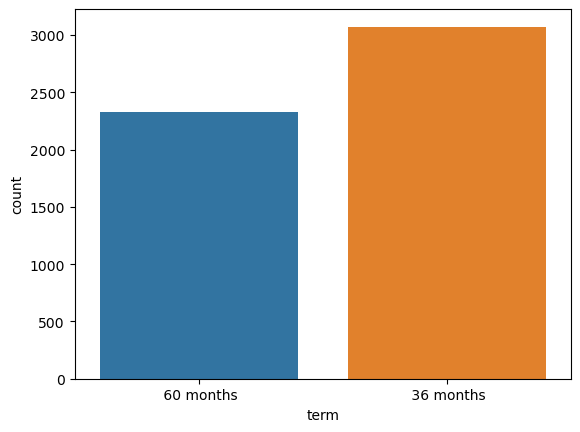

In [96]:
sns.countplot(x='term', data=loan_cleaned[loan_cleaned['loan_status']=='Charged Off'])

In [211]:
#Observation: More defaults when 'term' is 36 months

<Axes: xlabel='pub_rec_bankruptcies', ylabel='count'>

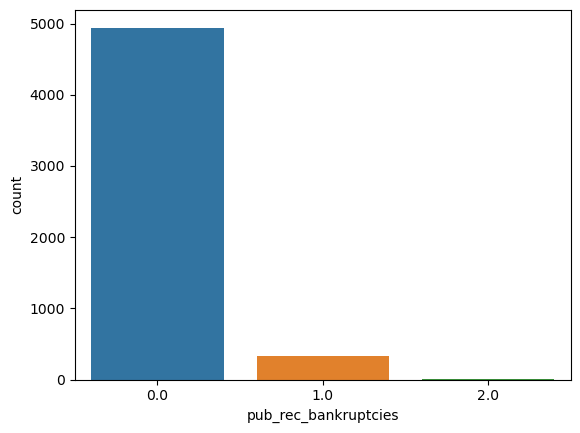

In [98]:
sns.countplot(x='pub_rec_bankruptcies', data=loan_cleaned[loan_cleaned['loan_status']=='Charged Off'])

In [213]:
#Observation: More defaults when 'public_rec_bankruptcies' is 0 (suprisingly not 1)

<Axes: xlabel='installment_category', ylabel='count'>

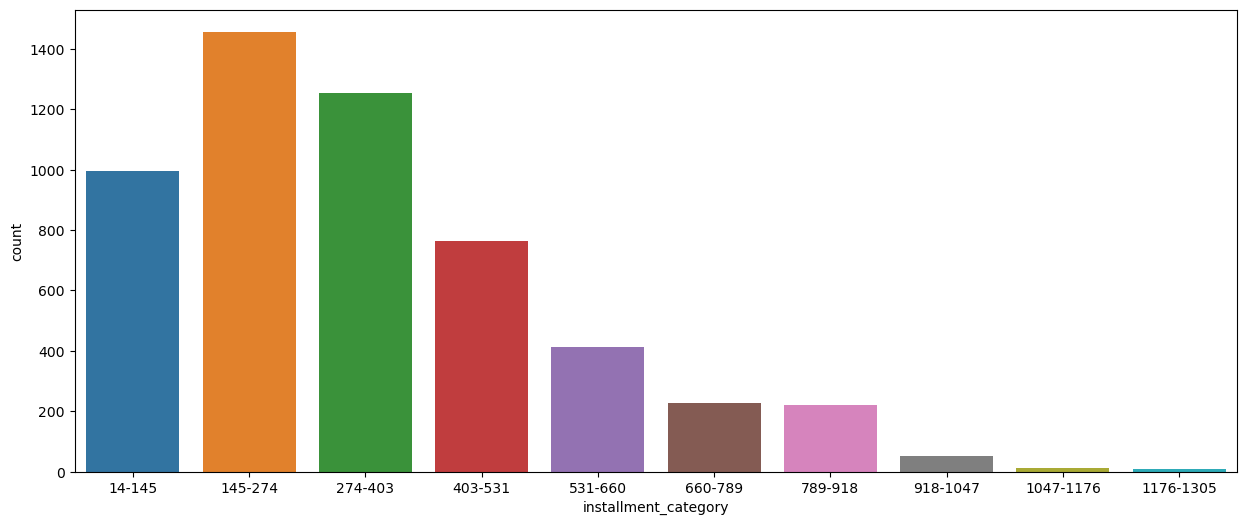

In [100]:
fig,ax = plt.subplots(figsize = (15,6))
sns.countplot(x='installment_category', data=loan_cleaned[loan_cleaned['loan_status']=='Charged Off'])

In [215]:
#Observation: More defaults when 'installment' are between 145-274

<Axes: xlabel='funded_amnt_inv_category', ylabel='count'>

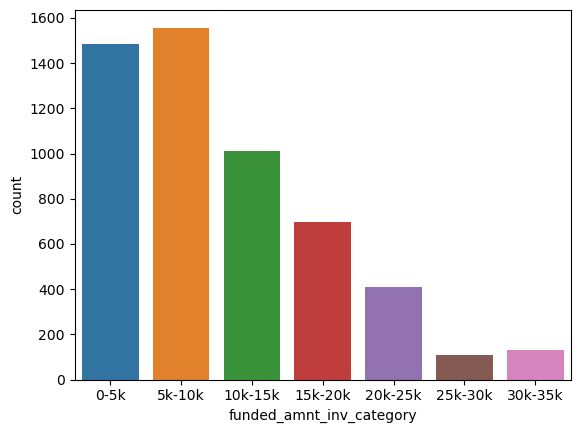

In [102]:
sns.countplot(x='funded_amnt_inv_category', data=loan_cleaned[loan_cleaned['loan_status']=='Charged Off'])

In [217]:
#Observation: More defaults when 'funded_amnt_inv' is between 5-10k

<Axes: xlabel='loan_amnt_category', ylabel='count'>

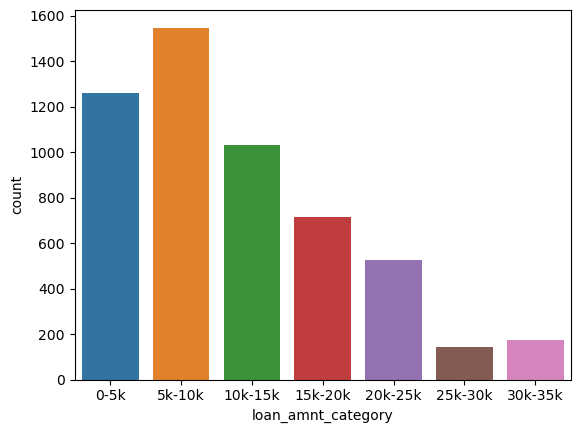

In [104]:
sns.countplot(x='loan_amnt_category', data=loan_cleaned[loan_cleaned['loan_status']=='Charged Off'])

In [219]:
#Observation: More defaults when 'loan_amnt' is between 5-10k

<Axes: xlabel='dti_category', ylabel='count'>

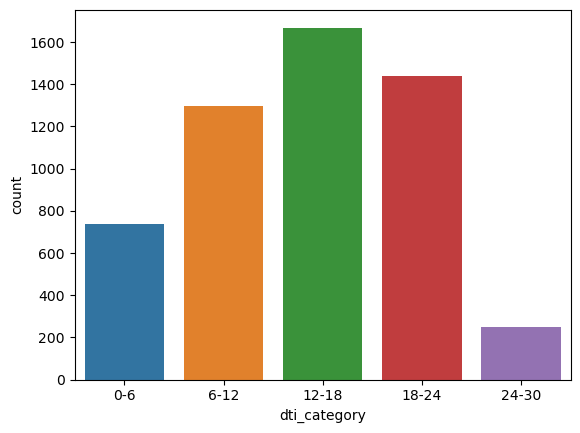

In [105]:
sns.countplot(x='dti_category', data=loan_cleaned[loan_cleaned['loan_status']=='Charged Off'])

In [221]:
#Observation: More defaults when 'dti' is between 12-18

<Axes: xlabel='verification_status', ylabel='count'>

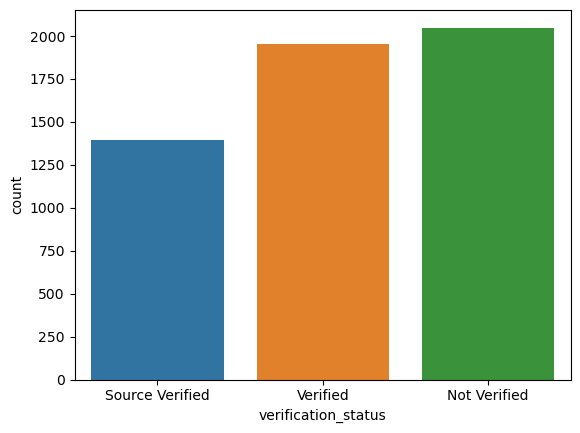

In [107]:
sns.countplot(x='verification_status', data=loan_cleaned[loan_cleaned['loan_status']=='Charged Off'])

In [223]:
#Observation: More defaults when 'verification_status' is 'Not verified'

In [227]:
#Bivariate Analysis

In [229]:
#Bivariate Analysis

<Axes: xlabel='term', ylabel='purpose'>

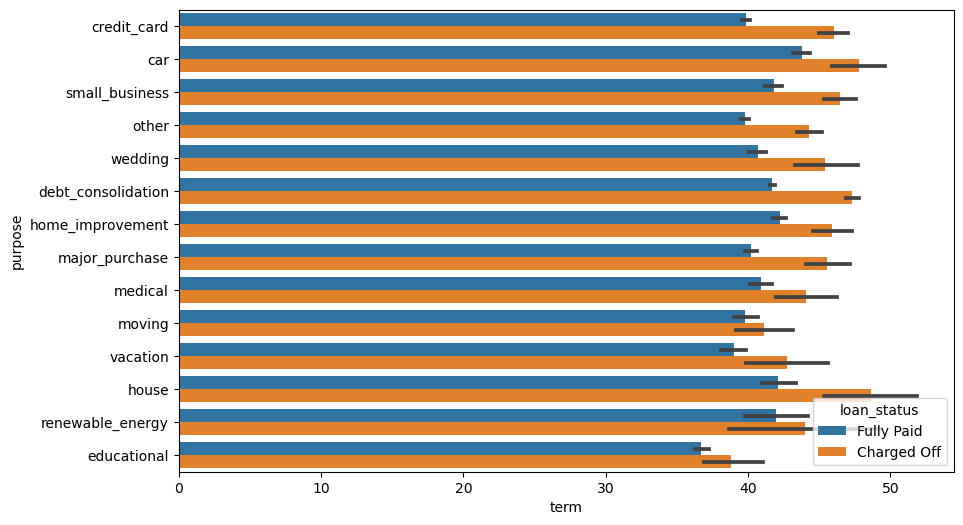

In [112]:
#Bivariate Analysis - compare the default rates across two types of categorical variables loan_status / purpose
plt.figure(figsize=[10, 6])
sns.barplot(x='term', y="purpose", hue='loan_status', data=loan_cleaned)

In [148]:
# house, home_improvement, debt_consolidation, car with longer terms has higher default rate

In [150]:
# Analyzing annial_inc with other columns

<Axes: xlabel='annual_inc', ylabel='purpose'>

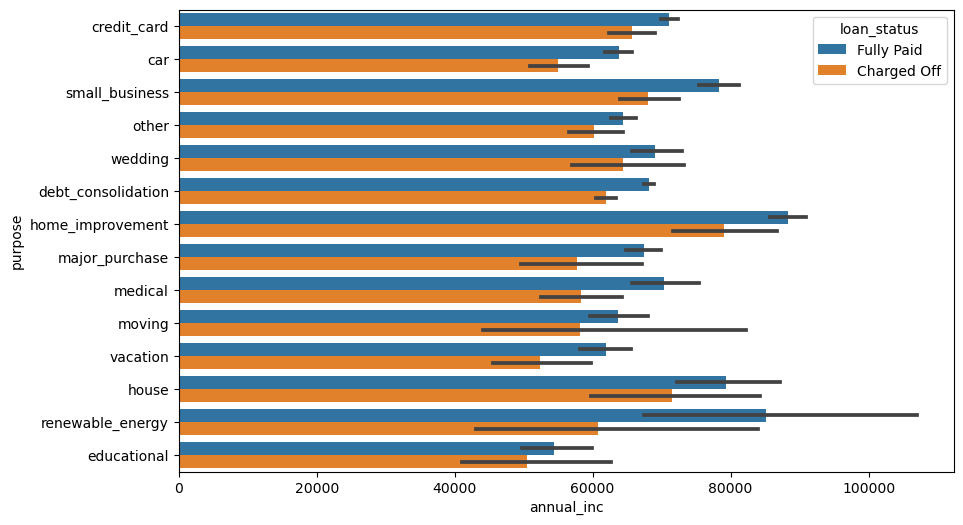

In [113]:
#annial_inc vs. purpose
plt.figure(figsize=[10, 6])
sns.barplot(x='annual_inc', y="purpose", hue='loan_status', data=loan_cleaned)

In [237]:
# Though the number of loans applied and defaulted are the highest in number for "debt_consolation", the annual income of those who applied isn't the highest.
# Applicants with higher salary mostly applied loans for "home_improvment", "house", "renewable_energy" and "small_businesses"
#Observation: Applicants taking loan for 'home improvement' and have income of 60k -70k (to be determined)

<Axes: xlabel='annual_inc_category', ylabel='loan_amnt'>

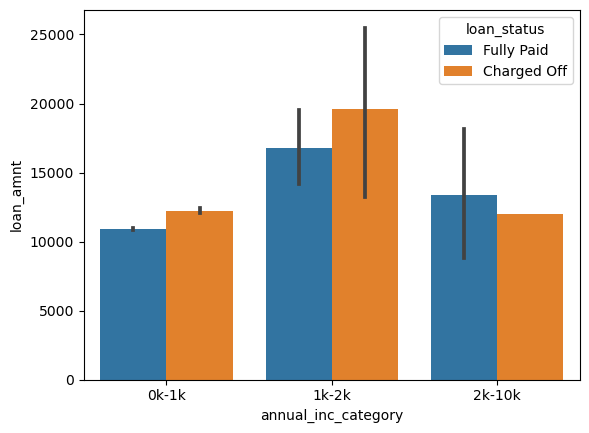

In [ ]:
#annual_inc vs. loan_amnt
plt.figure(figsize=[10, 6])
sns.barplot(x='annual_inc_category', y="loan_amnt", hue='loan_status', data=loan_cleaned)
#Across all the income groups, the loan_amount is higher for people who defaulted.

<Axes: xlabel='int_rate_category', ylabel='annual_inc'>

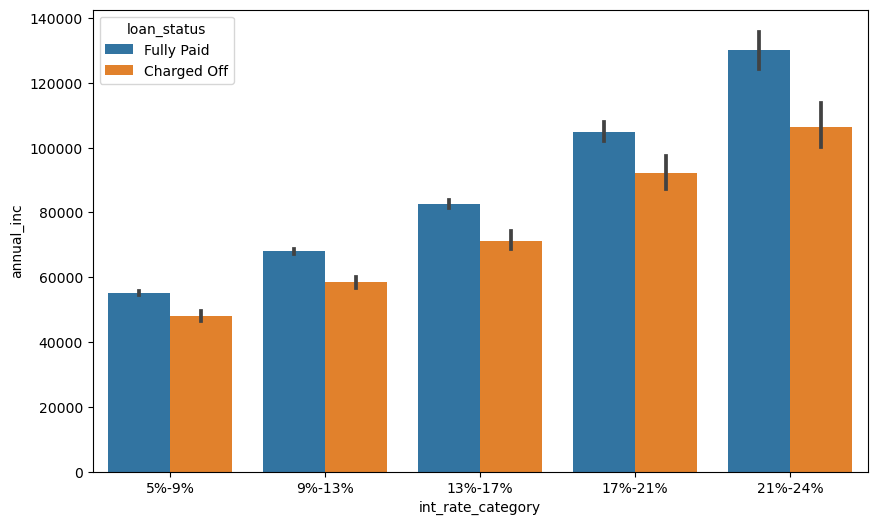

In [157]:
#annual_inc vs. int_rate
plt.figure(figsize=[10, 6])
sns.barplot(x='int_rate_category', y="annual_inc", hue='loan_status', data=loan_cleaned)

In [231]:
#Higher salary range gets loan on higher interest and higher defaults

In [233]:
#Observation: Higher defaults when Applicants who receive interest at the rate of 21-24% and have an income of 70k-80k  (to be determined)

<Axes: xlabel='annual_inc', ylabel='home_ownership'>

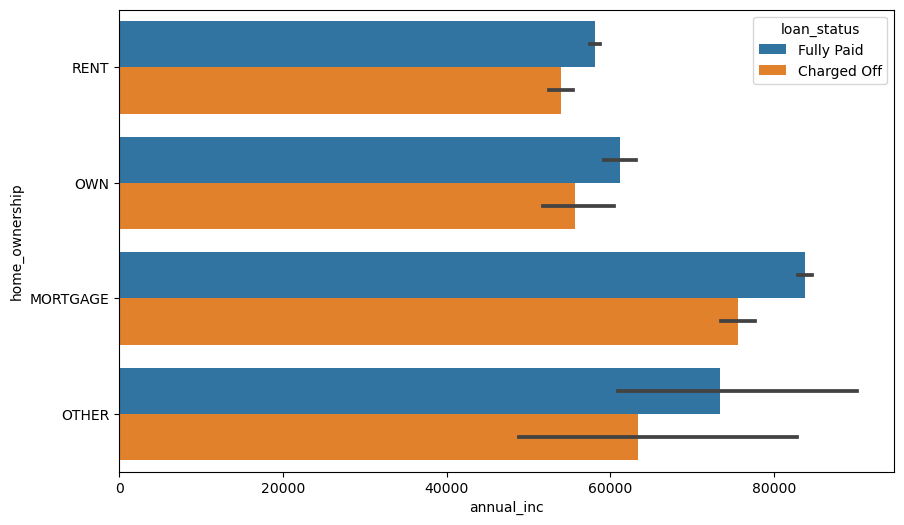

In [116]:
#annual_inc vs. home_ownership
plt.figure(figsize=[10, 6])
sns.barplot(x='annual_inc', y="home_ownership", hue='loan_status', data=loan_cleaned)

In [235]:
#defaults in REnt or mortgage and higher salary 60-90k applied for Mortgage or others
#Observation: Applicants whose home ownership is 'MORTGAGE and have income of 60-70k (to be determined)

In [161]:
#Comparing loan_amnt with other columns

<Axes: xlabel='loan_amnt', ylabel='purpose'>

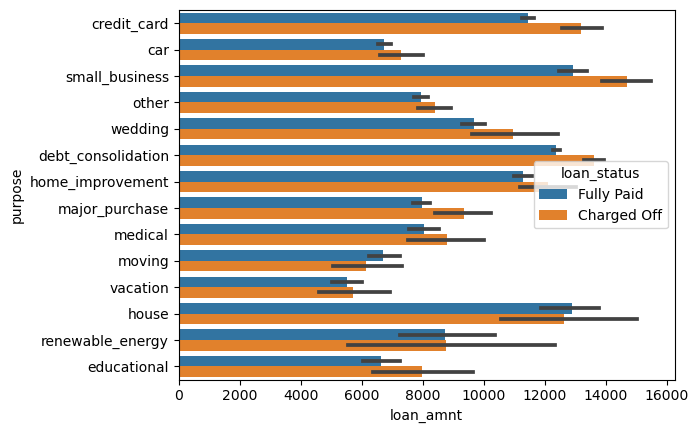

In [163]:
sns.barplot(x='loan_amnt', y="purpose", hue='loan_status', data=loan_cleaned)

<Axes: xlabel='loan_amnt_category', ylabel='int_rate'>

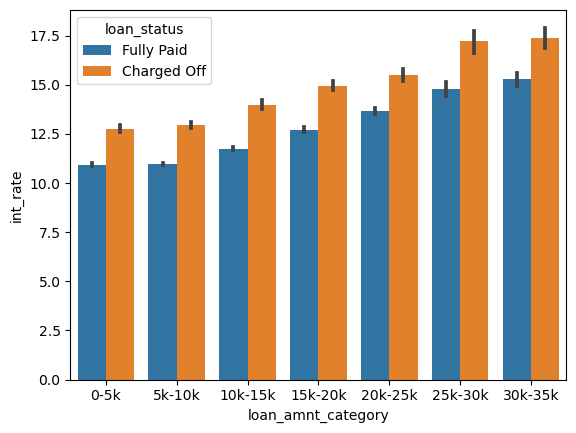

In [183]:
sns.barplot(x='loan_amnt_category', y="int_rate", hue='loan_status', data=loan_cleaned)

In [239]:
#Observation: Applicants who have taken a loan in the range 25k - 35k and are charged interest rate of 15-17.5 %

<Axes: xlabel='loan_amnt', ylabel='grade'>

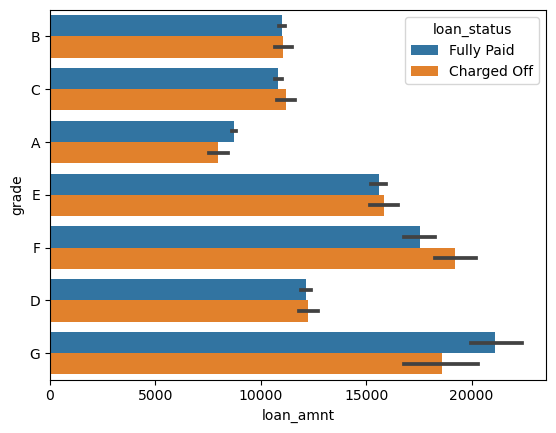

In [167]:
sns.barplot(x='loan_amnt', y="grade", hue='loan_status', data=loan_cleaned)

In [241]:
#Observation: When grade is F and loan amount is between 15k-20k

<Axes: xlabel='loan_amnt', ylabel='verification_status'>

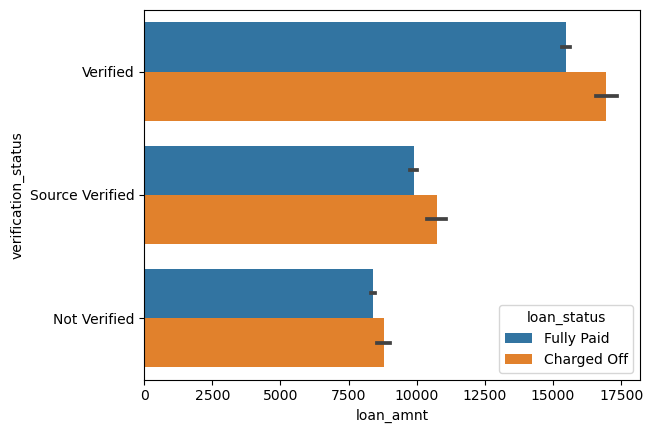

In [169]:
sns.barplot(x='loan_amnt', y="verification_status", hue='loan_status', data=loan_cleaned)

In [243]:
#Looking at the verification status data, verified loan applications tend to have higher loan amount. 
#Which might indicate that the firms are first verifying the loans with higher values
#Observation:When the loan is verified and loan amount is above 16k

<Axes: xlabel='loan_amnt', ylabel='home_ownership'>

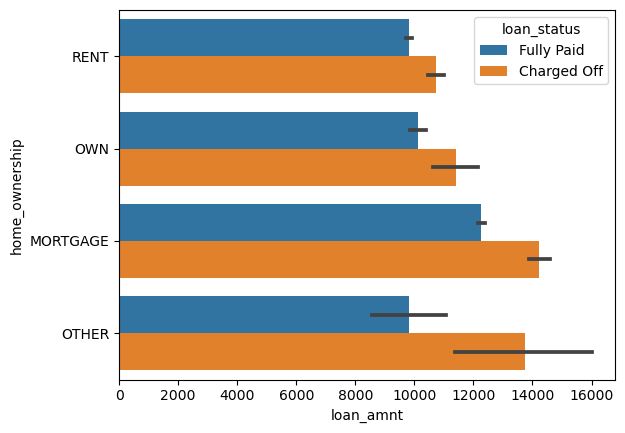

In [171]:
sns.barplot(x='loan_amnt', y="home_ownership", hue='loan_status', data=loan_cleaned)

In [245]:
#Observation: Applicants whose home ownership is 'MORTGAGE and have loan of 14-16k

<Axes: xlabel='loan_amnt_category', ylabel='emp_length'>

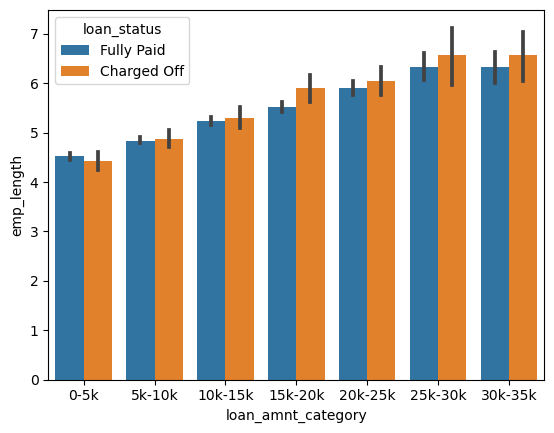

In [173]:
sns.barplot(x='loan_amnt_category', y="emp_length", hue='loan_status', data=loan_cleaned)

In [247]:
#Employees with longer working history got the loan approved for a higher amount.
#Observation: When employment length is 10yrs and loan amount is 12k-14k

<Axes: xlabel='int_rate', ylabel='grade'>

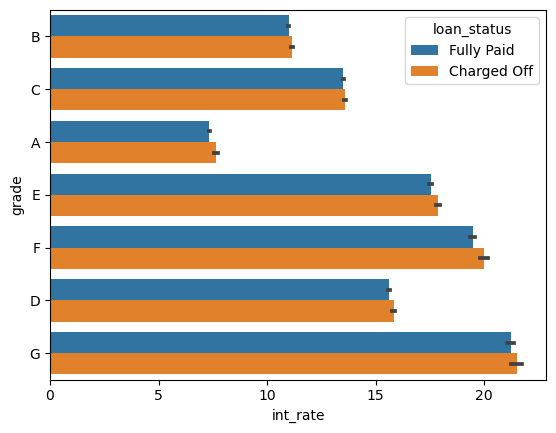

In [181]:
#int_rate vs grade
sns.barplot(x='int_rate', y="grade", hue='loan_status', data=loan_cleaned)

In [249]:
#The interest rate for charged off loans is pretty high than that of fully paid loans in all the loan_amount groups.
#This can be a pretty strong driving factor for loan defaulting.
#Observation: For grade G and interest rate above 20%